In [2]:
import numpy as np
import pandas as pd

from pathlib import Path
def make_gravitational_waves(
    path_to_data: Path,
    n_signals: int = 30,
    downsample_factor: int = 2,
    r_min: float = 0.075,
    r_max: float = 0.65,
    n_snr_values: int = 10,
        ):
    def padrand(V, n, kr):
        cut = np.random.randint(n)
        rand1 = np.random.randn(cut)
        rand2 = np.random.randn(n - cut)
        out = np.concatenate((rand1 * kr, V, rand2 * kr))
        return out

    Rcoef = np.linspace(r_min, r_max, n_snr_values)
    Npad = 500  # number of padding points on either side of the vector
    gw = np.load(path_to_data / "gravitational_wave_signals.npy")
    #../input/gravitational-wave-signals/gravitational_wave_signals.npy
    # gw = np.load("../input/gravitational-wave-signals/gravitational_wave_signals.npy")
    Norig = len(gw["data"][0])
    Ndat = len(gw["signal_present"])
    N = int(Norig / downsample_factor)

    ncoeff = []
    Rcoeflist = []

    for j in range(n_signals):
        ncoeff.append(10 ** (-19) * (1 / Rcoef[j % n_snr_values]))
        Rcoeflist.append(Rcoef[j % n_snr_values])

    noisy_signals = []
    gw_signals = []
    k = 0
    labels = np.zeros(n_signals)

    for j in range(n_signals):
        signal = gw["data"][j % Ndat][range(0, Norig, downsample_factor)]
        sigp = int((np.random.randn() < 0))
        noise = ncoeff[j] * np.random.randn(N)
        labels[j] = sigp
        if sigp == 1:
            rawsig = padrand(signal + noise, Npad, ncoeff[j])
            if k == 0:
                k = 1
        else:
            rawsig = padrand(noise, Npad, ncoeff[j])
        noisy_signals.append(rawsig.copy())
        gw_signals.append(signal)

    return noisy_signals, gw_signals, labels

In [3]:
#from data.generate_datasets import make_gravitational_waves
from pathlib import Path

R = 0.65
n_signals = 100
DATA = Path("./data")

noisy_signals, gw_signals, labels = make_gravitational_waves(
    path_to_data=DATA, n_signals=n_signals, r_min=R, r_max=R, n_snr_values=1
)

print(f"Number of noisy signals: {len(noisy_signals)}")
print(f"Number of timesteps per series: {len(noisy_signals[1])}")

Number of noisy signals: 100
Number of timesteps per series: 8692


In [3]:
print(noisy_signals)

[array([-4.84413592e-20, -1.60386529e-19, -2.57519735e-19, ...,
       -3.10938074e-19,  1.01890495e-19,  8.59778492e-20]), array([ 6.38759504e-20, -3.77591182e-19, -2.90951016e-21, ...,
       -2.50513928e-19, -1.23147421e-19, -2.33808497e-19]), array([-1.68153431e-19,  5.27611605e-20, -1.66125192e-19, ...,
       -2.16375656e-19,  1.03146828e-20, -1.27049926e-20]), array([-7.47932734e-21,  1.67051253e-19, -3.83332806e-20, ...,
       -1.51061601e-19,  2.68110718e-19,  7.81676294e-20]), array([-1.20442558e-19, -1.97592696e-19,  3.06858060e-19, ...,
        8.75496310e-20,  1.27965318e-19,  1.70109456e-19]), array([-4.15862776e-20,  8.12654652e-20, -1.20588462e-19, ...,
       -1.58636714e-19,  3.54851188e-20, -2.04639569e-19]), array([-2.20508105e-19, -2.44747756e-19,  7.18400456e-20, ...,
       -7.54891361e-20, -1.11645001e-19, -1.11758361e-19]), array([ 1.37366854e-19,  1.21812513e-19,  2.72345906e-20, ...,
       -9.31077406e-20, -2.36584009e-20, -1.57751568e-19]), array([ 1.29591

In [8]:
arr = np.array(noisy_signals)
gw = np.array(gw_signals)
np.savetxt('gw.csv', gw, delimiter=',')
print(gw.shape)


(100, 8192)


In [5]:
print(labels)
print(len(labels))

[1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0.
 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1.
 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0.
 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1.
 1. 0. 1. 1.]
100


In [ ]:
gw_noise = arr[labels == 1]
pure_noise = arr[labels == 1]

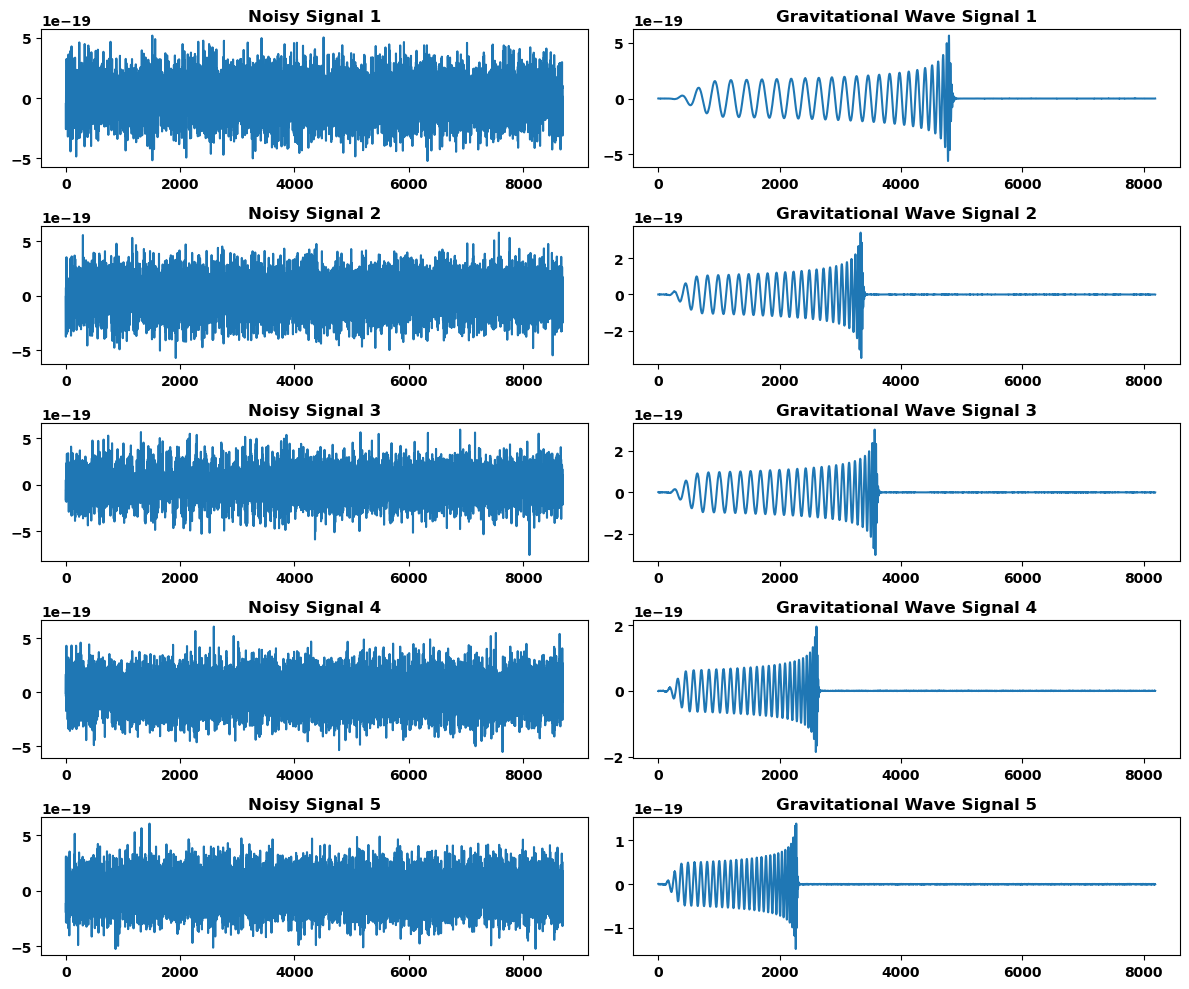

In [6]:
import matplotlib.pyplot as plt

n_plots = 5

fig, axes = plt.subplots(n_plots, 2, figsize=(12, 10))

for i in range(n_plots):
    axes[i, 0].plot(noisy_signals[i])
    axes[i, 0].set_title(f'Noisy Signal {i+1}')
    
    axes[i, 1].plot(gw_signals[i])
    axes[i, 1].set_title(f'Gravitational Wave Signal {i+1}')

plt.tight_layout()
plt.show()

In [7]:
import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# get the index corresponding to the first pure noise time series
background_idx = np.argmin(labels)
# get the index corresponding to the first noise + gravitational wave time series
signal_idx = np.argmax(labels)

ts_noise = noisy_signals[background_idx]
ts_background = noisy_signals[signal_idx]
ts_signal = gw_signals[signal_idx]

fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Scatter(x=list(range(len(ts_noise))), y=ts_noise, mode="lines", name="noise"),
    row=1,
    col=1,
)

fig.add_trace(
    go.Scatter(
        x=list(range(len(ts_background))),
        y=ts_background,
        mode="lines",
        name="background",
    ),
    row=1,
    col=2,
)

fig.add_trace(
    go.Scatter(x=list(range(len(ts_signal))), y=ts_signal, mode="lines", name="signal"),
    row=1,
    col=2,
)
fig.show()


In [8]:
from gtda.time_series import SingleTakensEmbedding
embedding_dimension = 30
embedding_time_delay = 30
stride = 5

embedder = SingleTakensEmbedding(
    parameters_type="search", n_jobs=6, time_delay=embedding_time_delay, dimension=embedding_dimension, stride=stride
)

y_gw_embedded = embedder.fit_transform(gw_signals[0])

In [9]:
from sklearn.decomposition import PCA
from gtda.plotting import plot_point_cloud

pca = PCA(n_components=3)
y_gw_embedded_pca = pca.fit_transform(y_gw_embedded)

plot_point_cloud(y_gw_embedded_pca)

In [10]:
embedding_dimension = 30
embedding_time_delay = 30
stride = 5

embedder = SingleTakensEmbedding(
    parameters_type="search", n_jobs=6, time_delay=embedding_time_delay, dimension=embedding_dimension, stride=stride
)

y_noise_embedded = embedder.fit_transform(noisy_signals[background_idx])

pca = PCA(n_components=3)
y_noise_embedded_pca = pca.fit_transform(y_noise_embedded)

plot_point_cloud(y_noise_embedded_pca)

In [11]:
embedding_dimension = 30
embedding_time_delay = 30
stride = 5

embedder = SingleTakensEmbedding(
    parameters_type="search", n_jobs=6, time_delay=embedding_time_delay, dimension=embedding_dimension, stride=stride
)

y_signal_embedded = embedder.fit_transform(noisy_signals[signal_idx])

pca = PCA(n_components=3)
y_signal_embedded_pca = pca.fit_transform(y_signal_embedded)

plot_point_cloud(y_signal_embedded_pca)

Topology Pipeline

Takens Embedding
    Reconstructs a phase space from time series data
    Parameters: 'time_delay', 'dimension' and 'stride'

CollectionTransformer
    Applies PCA fro dimesnionality reduction
    'n_jobs=1' allows parallel processing

VietoriesRipsPeristence:
    Computes persistent homology
    'homology_dimension=[0,1] means it computes H_0 and H_1

Scaler:
    Scales the data for uniformity

PersistenceEntropy: 
    Computes entropy of persistence diagrams
    'normalize=True' and 'nan_fill_value=-10' handle normalization and NaN values



In [145]:
from gtda.diagrams import PersistenceEntropy, Scaler
from gtda.homology import VietorisRipsPersistence
from gtda.metaestimators import CollectionTransformer
from gtda.pipeline import Pipeline
from gtda.time_series import TakensEmbedding

embedding_dimension = 200
embedding_time_delay = 10
stride = 10

embedder = TakensEmbedding(time_delay=embedding_time_delay,
                           dimension=embedding_dimension,
                           stride=stride)

batch_pca = CollectionTransformer(PCA(n_components=3), n_jobs=-1)

persistence = VietorisRipsPersistence(homology_dimensions=[0, 1], n_jobs=-1)

scaling = Scaler()

entropy = PersistenceEntropy(normalize=True, nan_fill_value=-10)


steps = [("embedder", embedder),
         ("pca", batch_pca),
         ("persistence", persistence),
         ("scaling", scaling),
         ("entropy", entropy)]

topological_transformer = Pipeline(steps)


### Takens Embedding

Parameters

    - time_delay: The lag between successive points in the embedding.
    - dimension: The number of dimensions (or the embedding dimension).
    - stride: The step size to create the next embedding vector.



In [13]:
embedding_dimension = 200
embedding_time_delay = 10
stride = 10

embedder = TakensEmbedding(time_delay=embedding_time_delay,
                           dimension=embedding_dimension,
                           stride=stride)

embedded_signals = embedder.fit_transform(arr)

# Print the shape of the transformed data for the first signal
print("Shape of the embedded signal:", embedded_signals.shape)


# Print the first embedded vector for the first signal
#print("First embedded vector of the first signal:", embedded_signals[0, 0, :])

# Print the number of vectors created from the first signal
print("Number of vectors created from the first signal:", embedded_signals[0].shape[0])


Shape of the embedded signal: (100, 671, 200)
Number of vectors created from the first signal: 671


In [14]:
batch_pca = CollectionTransformer(PCA(n_components=3), n_jobs=-1)

pca_transformed_signals = batch_pca.fit_transform(embedded_signals)


Functioning:

- CollectionTransformer takes the collection of embedded signals and applies PCA to each one independently.

- Each signal in the embedded signals collection is treated as a separate instance.

- PCA is applied to each signal to reduce its dimensionality from the potentially high-dimensional embedding space (depending on the result of the embedding) to a 3-dimensional space.

Output:

- The result is a collection of signals where each signal has been reduced to 3 principal components. This dimensionality reduction helps in further processing and analysis, making the data more manageable and potentially highlighting important features.

In [15]:
print(pca_transformed_signals.shape)

(100, 671, 3)


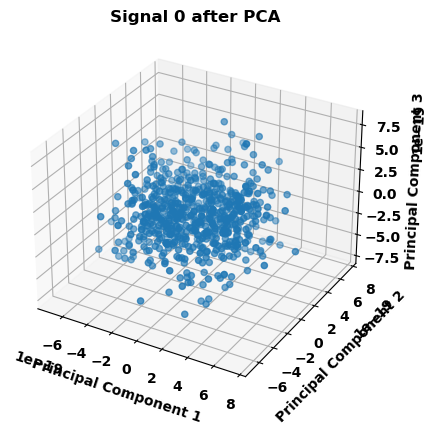

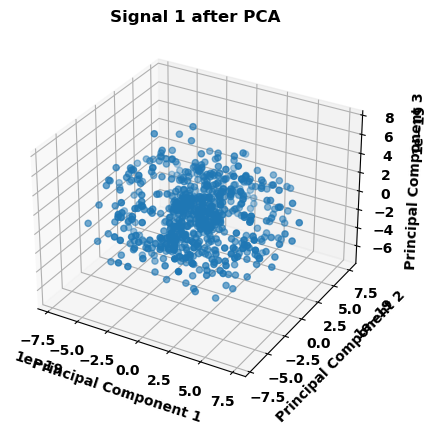

In [72]:
n_signals = 2 # Number of signals
for signal_idx in range(n_signals):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    signal_pca = pca_transformed_signals[signal_idx]
    
    ax.scatter(signal_pca[:, 0], signal_pca[:, 1], signal_pca[:, 2], marker='o')
    
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    ax.set_title(f'Signal {signal_idx} after PCA')
    
    plt.show()

VietorisRipsPersistence:

Parameters:

- homology_dimensions: Specifies the dimensions of the homological features to be computed. For example, homology_dimensions=[0, 1] computes features in dimensions 0 and 1.

0-dimensional features: Connected components in the data.
1-dimensional features: Loops or cycles in the data.
- n_jobs: The number of jobs to run in parallel. n_jobs=-1 uses all available processors, making the computation faster.


Functioning:

Constructing Vietoris-Rips Complex:

For each point cloud (i.e., each signal transformed by PCA), the algorithm constructs a Vietoris-Rips complex.
A Vietoris-Rips complex is a simplicial complex constructed from the point cloud data by adding simplices based on a distance threshold. For example, if the distance between points is below a certain threshold, an edge (1-simplex) is added between them. Higher-dimensional simplices (triangles, tetrahedra, etc.) are added similarly.


Output:

- The output is a collection of persistence diagrams, one for each signal.

- Each persistence diagram contains points, where each point represents a topological feature, with coordinates indicating its birth and death scales.

Betti 0 and 1

In [107]:
persistence_Betti_01 = VietorisRipsPersistence(homology_dimensions=[0,1], n_jobs=-1)
persistence_diagrams = persistence_Betti_01.fit_transform(pca_transformed_signals)



In [143]:
first_signal_diagram = persistence_diagrams[0]
counter = 0

# Check if there is any entry with the third value (homology dimension) equal to 1
for i in range(first_signal_diagram.shape[0]):
    if first_signal_diagram[i, 2] == 1:
        counter += 1
        print(f"Entry {i} has a homology dimension of 1: {first_signal_diagram[i]}")

print(f"There are {counter} entries with dimension 1")


Entry 670 has a homology dimension of 1: [3.44655943e-19 3.47700123e-19 1.00000000e+00]
Entry 671 has a homology dimension of 1: [3.17856713e-19 3.54152959e-19 1.00000000e+00]
Entry 672 has a homology dimension of 1: [2.87223992e-19 2.91506151e-19 1.00000000e+00]
Entry 673 has a homology dimension of 1: [2.49354630e-19 2.57309496e-19 1.00000000e+00]
Entry 674 has a homology dimension of 1: [2.29747115e-19 2.38078891e-19 1.00000000e+00]
Entry 675 has a homology dimension of 1: [2.26805583e-19 2.76513968e-19 1.00000000e+00]
Entry 676 has a homology dimension of 1: [2.2208233e-19 2.4702061e-19 1.0000000e+00]
Entry 677 has a homology dimension of 1: [2.20769129e-19 2.21772654e-19 1.00000000e+00]
Entry 678 has a homology dimension of 1: [2.18457495e-19 2.40127197e-19 1.00000000e+00]
Entry 679 has a homology dimension of 1: [2.08539587e-19 2.59048463e-19 1.00000000e+00]
Entry 680 has a homology dimension of 1: [2.07341079e-19 2.18519611e-19 1.00000000e+00]
Entry 681 has a homology dimension 

In [141]:
print(persistence_diagrams.shape)
print(persistence_diagrams[0,670, :])
# print(persistence_diagrams[0,:,0])



(100, 1021, 3)
[3.44655943e-19 3.47700123e-19 1.00000000e+00]


This means you have 100 signals, and for each signal, the persistence diagram has 1021 points, each represented by 3 coordinates (typically birth, death, and homology dimension).

In [65]:
from gtda.plotting import plot_diagram

signal_idx = 0
diagram = persistence_diagrams[signal_idx]
plot_diagram(diagram)


Betti 1 only 

In [99]:
persistence_Betti_1 = VietorisRipsPersistence(homology_dimensions=[1], n_jobs=-1)
persistence_diagrams_1 = persistence_Betti_1.fit_transform(pca_transformed_signals)

In [100]:
print(persistence_diagrams_1.shape)
# print(persistence_diagrams_1[:,0,0])
# print(persistence_diagrams_1[0,:,0])
print(persistence_diagrams_1[0,0,:])

(100, 351, 3)
[3.44655943e-19 3.47700123e-19 1.00000000e+00]


This means you have 100 signals, and for each signal, the persistence diagram has 351 points, each represented by 3 coordinates (birth, death, and homology dimension, but in this case, all points are for homology dimension 1).

In [101]:
signal_idx = 0
diagram = persistence_diagrams_1[signal_idx]
plot_diagram(diagram)

Functioning:
Standardization:

If method='standard', the function standardizes the persistence diagrams using the mean and standard deviation of each dimension (birth and death times).
Standardization transforms the data such that it has a mean of 0 and a standard deviation of 1.
Scaling Process:

The scaling process ensures that the features (birth and death times) are on a similar scale, which can be important for certain algorithms that are sensitive to the scale of the input data.
Distance Metric:

The choice of metric determines how distances between persistence diagrams are computed.
'bottleneck' distance is a popular choice because it is robust and considers the correspondence between features in the two diagrams.
Skew:

If skew=True, the scaling is applied to each feature (dimension) of the persistence diagram separately.
This can be useful if the features have different scales and need to be scaled independently.

In [20]:
scaling = Scaler()
scaled_diagrams = scaling.fit_transform(persistence_diagrams)

print(scaled_diagrams.shape)

(100, 1021, 3)


In [21]:
signal_idx = 0
diagram = scaled_diagrams[signal_idx]
plot_diagram(diagram)


Functioning:
Entropy Calculation:

For each persistence diagram in the input, the function computes the entropy using the formula for Shannon entropy:

$$H(X)=-\sum_i p_i \log \left(p_i\right)$$

​where $p_i$ is the probability of persistence point $i$ occurring in the persistence diagram.


Normalization:

If normalize=True, the computed entropy values are normalized by the maximum possible entropy for the given diagram. This normalization can be useful for comparing entropy values across diagrams or datasets.
Handling NaN Values:

If any probabilities in the entropy calculation are NaN (e.g., due to empty persistence intervals), they are filled with the nan_fill_value before computing the entropy.
Output:

The output is a single entropy value for each input persistence diagram, representing the complexity or unpredictability of the topological features in the diagram.

In [48]:
entropy = PersistenceEntropy(normalize=True, nan_fill_value=-10)
entropy_values = entropy.fit_transform(scaled_diagrams)

In [49]:
print(entropy_values.shape)
print(entropy_values)

(100, 2)
[[1.18757922 1.67360418]
 [1.22971308 1.65839753]
 [1.17393942 1.52499013]
 [1.21131968 1.68589614]
 [1.21255543 1.70893729]
 [1.16958631 1.60170842]
 [1.22699792 1.71362072]
 [1.21048477 1.69052781]
 [1.19575906 1.65622172]
 [1.1140909  1.46112031]
 [1.21664651 1.67860718]
 [1.204343   1.65999314]
 [1.16555191 1.55007362]
 [1.19003099 1.68727746]
 [1.19750729 1.66620271]
 [1.21304356 1.65260075]
 [1.23891716 1.68636546]
 [1.19469302 1.64031969]
 [1.19137515 1.67225019]
 [1.19473285 1.68872174]
 [1.15450922 1.54582417]
 [1.19316822 1.62138281]
 [1.04947837 1.28572182]
 [1.1349241  1.60819923]
 [1.19943851 1.67482429]
 [1.23079097 1.68972936]
 [1.1970177  1.51803405]
 [1.21381361 1.65933931]
 [1.22037769 1.75090712]
 [1.18610929 1.68605123]
 [1.20608276 1.69066508]
 [1.19726709 1.66667853]
 [1.18237334 1.61269399]
 [1.03234387 1.29277758]
 [1.17333711 1.57095224]
 [1.22262976 1.65383544]
 [1.18695359 1.61519795]
 [1.21957788 1.62788998]
 [1.17431158 1.55577473]
 [1.17941988 1.5

First Column (Column Index 0): This column represents the entropy values for each persistence diagram. Each value indicates the entropy of the corresponding diagram, which reflects the complexity or unpredictability of the topological features in that diagram.

Second Column (Column Index 1): This column is not explicitly labeled in your output, but based on the context, it likely represents the maximum possible entropy for each diagram. This value is used for normalization, as mentioned in the PersistenceEntropy explanation.

Interpreting these values:

Entropy Values: Higher entropy values indicate more complex and unpredictable topological features in the corresponding persistence diagram.
Maximum Possible Entropy: This value is used to normalize the entropy values. Normalized entropy values (e.g., between 0 and 1) allow for easier comparison of the complexity of different diagrams, as they account for variations in diagram sizes and structures.

Lower Entropy Values:
Lower entropy values indicate that the topological features in the persistence diagram are more predictable or simpler. In other words, the persistence intervals (representing features like connected components, loops, etc.) are more uniform or less varied.

Higher Entropy Values:
Higher entropy values indicate greater complexity and unpredictability in the topological features. The persistence intervals are more varied, suggesting a more complex structure in the data.

Example Interpretation:
If you find that gravitational wave signals consistently have higher entropy values compared to pure noise signals, then higher entropy values would be an indicator of the presence of gravitational waves.
Conversely, if pure noise signals have higher entropy, then lower entropy values would indicate the presence of gravitational waves.

Visualize and Compare: Plot the entropy values against your labels to see if there's a clear separation between the gravitational wave signals and noise.

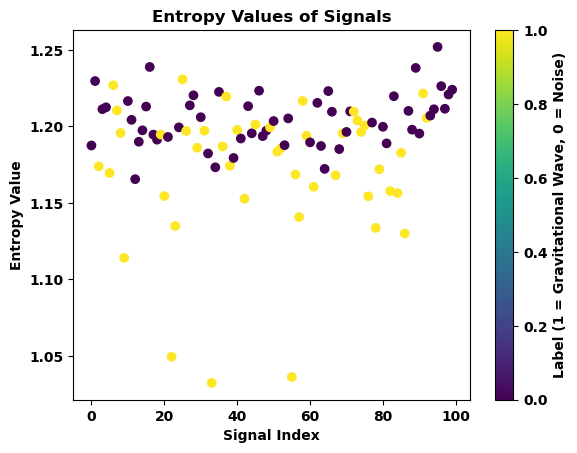

In [50]:
just_entropy_values = entropy_values[:, 0]

# Plotting
plt.scatter(range(len(just_entropy_values)), just_entropy_values, c=labels, cmap='viridis')
plt.xlabel('Signal Index')
plt.ylabel('Entropy Value')
plt.title('Entropy Values of Signals')
plt.colorbar(label='Label (1 = Gravitational Wave, 0 = Noise)')
plt.show()

Statistical Analysis: Perform statistical tests to determine if there's a significant difference in entropy values between the two classes.

In [53]:
# Separate the entropy values by label
entropy_gravitational_waves = just_entropy_values[labels == 1]
entropy_noise = just_entropy_values[labels == 0]

def descriptive_stats(data):
    return {
        'mean': np.mean(data),
        'median': np.median(data),
        'std_dev': np.std(data),
        'min': np.min(data),
        'max': np.max(data)
    }

stats_gravitational_waves = descriptive_stats(entropy_gravitational_waves)
stats_noise = descriptive_stats(entropy_noise)

print("Gravitational Waves Entropy Stats:", stats_gravitational_waves)
print("Noise Entropy Stats:", stats_noise)

Gravitational Waves Entropy Stats: {'mean': 1.1727785492467828, 'median': 1.1857448517699087, 'std_dev': 0.04463437148968027, 'min': 1.0323438698729532, 'max': 1.2307909731044884}
Noise Entropy Stats: {'mean': 1.2045688159531764, 'median': 1.204343002294668, 'std_dev': 0.017229186464991122, 'min': 1.165551905281953, 'max': 1.2520258889332678}


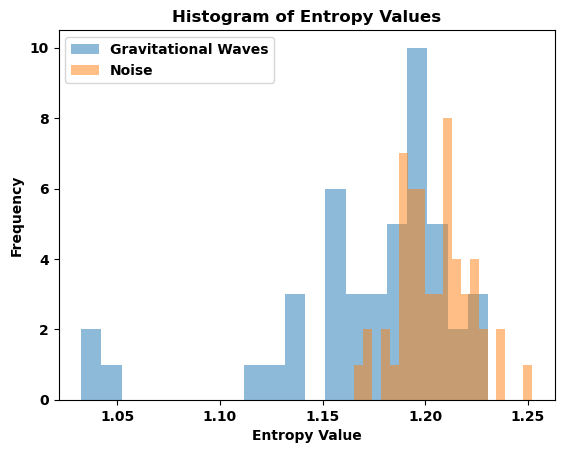

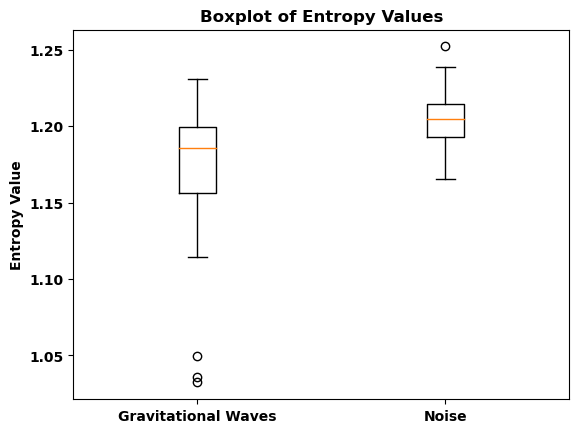

In [54]:

# Histogram
plt.hist(entropy_gravitational_waves, bins=20, alpha=0.5, label='Gravitational Waves')
plt.hist(entropy_noise, bins=20, alpha=0.5, label='Noise')
plt.xlabel('Entropy Value')
plt.ylabel('Frequency')
plt.title('Histogram of Entropy Values')
plt.legend()
plt.show()

# Boxplot
plt.boxplot([entropy_gravitational_waves, entropy_noise], labels=['Gravitational Waves', 'Noise'])
plt.ylabel('Entropy Value')
plt.title('Boxplot of Entropy Values')
plt.show()

In [55]:
from scipy.stats import ttest_ind, mannwhitneyu

# T-test
t_stat, t_p_value = ttest_ind(entropy_gravitational_waves, entropy_noise, equal_var=False)
print("T-test results: t-statistic = {:.3f}, p-value = {:.10f}".format(t_stat, t_p_value))

# Mann-Whitney U Test
u_stat, u_p_value = mannwhitneyu(entropy_gravitational_waves, entropy_noise, alternative='two-sided')
print("Mann-Whitney U test results: U-statistic = {:.3f}, p-value = {:.10f}".format(u_stat, u_p_value))

T-test results: t-statistic = -4.461, p-value = 0.0000410231
Mann-Whitney U test results: U-statistic = 622.000, p-value = 0.0000203461


The Pipeline function from the gtda.pipeline module in the giotto-tda library is used to streamline and automate a sequence of data processing steps. The Pipeline function ensures that these steps are executed in the specified order, with the output of each step serving as the input to the next step. This is particularly useful for complex data transformations and machine learning workflows, as it helps maintain clean, readable, and reproducible code.

Here's a detailed explanation of how the Pipeline function works:

Purpose of the Pipeline
Sequential Execution: Ensures that multiple processing steps are executed in a specified sequence.
Modularity: Allows each step to be defined independently, making the code more modular and easier to manage.
Reproducibility: Helps maintain reproducibility by encapsulating the entire data processing workflow in a single object.
Simplifies Code: Reduces the need for manual data passing between steps, minimizing potential errors and simplifying the code.

In [146]:
features = topological_transformer.fit_transform(noisy_signals)
print("Transformed data shape:", features.shape)
print("Transformed data example:", features[0])

Transformed data shape: (100, 2)
Transformed data example: [1.18063349 1.62536087]


In [71]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    entropy_values, labels, test_size=0.1, random_state=42
)

print(X_train)


[[1.19137515 1.67225019]
 [1.20608276 1.69066508]
 [1.20390355 1.64413831]
 [1.03234387 1.29277758]
 [1.19537192 1.67196031]
 [1.21255543 1.70893729]
 [1.15437315 1.56637118]
 [1.20257242 1.64100711]
 [1.16555191 1.55007362]
 [1.19726709 1.66667853]
 [1.03624062 1.29930243]
 [1.19793523 1.54075678]
 [1.1970177  1.51803405]
 [1.15275285 1.51270317]
 [1.19557098 1.60939516]
 [1.21304356 1.65260075]
 [1.19778768 1.62080362]
 [1.22639356 1.68337523]
 [1.1140909  1.46112031]
 [1.20975458 1.66392762]
 [1.204343   1.65999314]
 [1.19370937 1.691676  ]
 [1.18281495 1.63816198]
 [1.22037769 1.75090712]
 [1.20711991 1.66648059]
 [1.16958631 1.60170842]
 [1.20965119 1.64849478]
 [1.22316806 1.63700063]
 [1.22262976 1.65383544]
 [1.23891716 1.68636546]
 [1.19947128 1.57057961]
 [1.17333711 1.57095224]
 [1.21048477 1.69052781]
 [1.25202589 1.68851405]
 [1.21381361 1.65933931]
 [1.19473285 1.68872174]
 [1.18896796 1.61776177]
 [1.23079097 1.68972936]
 [1.21545376 1.72671154]
 [1.19003099 1.68727746]


In [59]:
from sklearn.metrics import accuracy_score, roc_auc_score


def print_scores(fitted_model):
    res = {
        "Accuracy on train:": accuracy_score(fitted_model.predict(X_train), y_train),
        "ROC AUC on train:": roc_auc_score(
            y_train, fitted_model.predict_proba(X_train)[:, 1]
        ),
        "Accuracy on valid:": accuracy_score(fitted_model.predict(X_valid), y_valid),
        "ROC AUC on valid:": roc_auc_score(
            y_valid, fitted_model.predict_proba(X_valid)[:, 1]
        ),
    }

    for k, v in res.items():
        print(k, round(v, 3))

In [61]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
print_scores(model)

Accuracy on train: 0.644
ROC AUC on train: 0.754
Accuracy on valid: 0.9
ROC AUC on valid: 0.875


In [147]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.fc1 = nn.Linear(2, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 64)
        self.fc5 = nn.Linear(64, 2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return x

# Instantiate the model
model = CNN()

# Print the model architecture
print(model)

# Example of using the model with the features from your pipeline
features_tensor = torch.tensor(features, dtype=torch.float32)
output = model(features_tensor)
print(output)

ModuleNotFoundError: No module named 'torch'

In [ ]:
from gwpy.timeseries import TimeSeries


In [ ]:
# Read the data from the file using NumPy
data = np.loadtxt('data.txt')

# Create a time array based on the information in the comments
start_time = 1187529241  # Starting GPS time
sampling_rate = 4096  # Samples per second
duration = 32  # Duration in seconds
time = np.linspace(start_time, start_time + duration, len(data))

# Create a TimeSeries object
ts = TimeSeries(data, t0=start_time, sample_rate=sampling_rate)

# Now you can work with the TimeSeries object 'ts'
print(ts)

TimeSeries([ 4.95779341e-19,  5.48371385e-19,  6.11824133e-19,
            ..., -5.58021342e-19, -5.46891920e-19,
            -5.35840153e-19]
           unit: dimensionless,
           t0: 1187529241.0 s,
           dt: 0.000244140625 s,
           name: None,
           channel: None)


In [ ]:
N = 100

for i in range(N):
    print(time[i])

1187529241.0
1187529241.0002441
1187529241.0004883
1187529241.0007324
1187529241.0009766
1187529241.0012207
1187529241.0014648
1187529241.001709
1187529241.0019531
1187529241.0021973
1187529241.0024414
1187529241.0026855
1187529241.0029297
1187529241.0031738
1187529241.003418
1187529241.003662
1187529241.0039062
1187529241.0041504
1187529241.0043945
1187529241.0046387
1187529241.0048828
1187529241.005127
1187529241.005371
1187529241.0056152
1187529241.0058594
1187529241.0061035
1187529241.0063477
1187529241.0065918
1187529241.006836
1187529241.00708
1187529241.0073242
1187529241.0075684
1187529241.0078125
1187529241.0080566
1187529241.0083008
1187529241.008545
1187529241.008789
1187529241.0090332
1187529241.0092773
1187529241.0095215
1187529241.0097656
1187529241.0100098
1187529241.010254
1187529241.010498
1187529241.0107422
1187529241.0109863
1187529241.0112305
1187529241.0114746
1187529241.0117188
1187529241.011963
1187529241.012207
1187529241.0124512
1187529241.0126953
1187529241.01

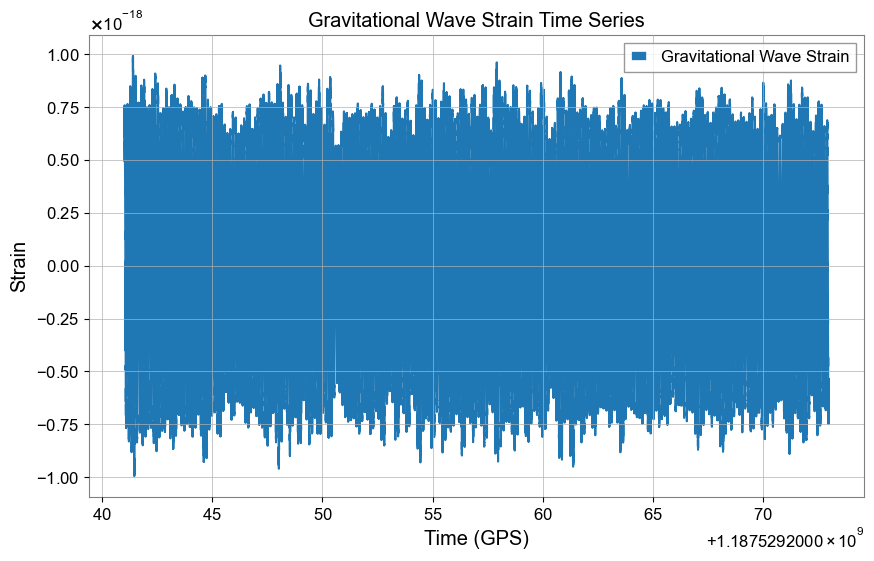

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(time, data, label='Gravitational Wave Strain')
plt.xlabel('Time (GPS)')
plt.ylabel('Strain')
plt.title('Gravitational Wave Strain Time Series')
plt.legend()
plt.grid(True)
plt.show()

c:\Users\David\anaconda3\envs\giotto\lib\site-packages\gwpy\plot\plot.py:287: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



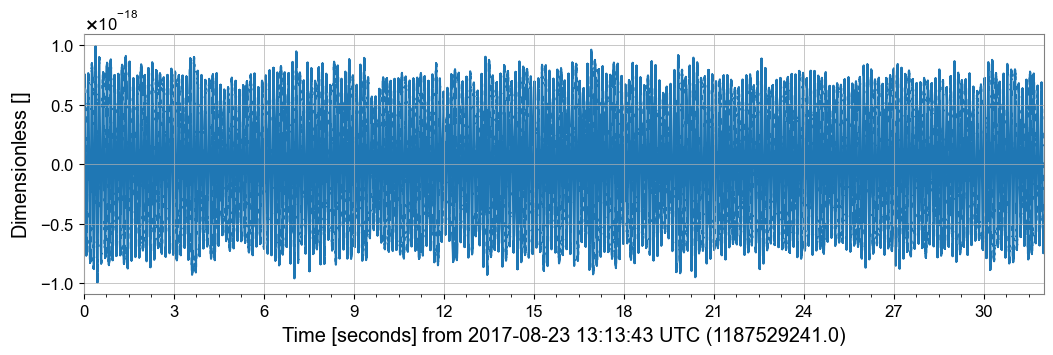

In [ ]:
plot = ts.plot()
plot.show()
